In [9]:

from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import neural_network
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import linear_model

def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    return trainInputs, trainOutputs, testInputs, testOutputs

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

def loadDigitData():
    from sklearn.datasets import load_digits

    data = load_digits()
    inputs = data.images
    outputs = data['target']
    outputNames = data['target_names']

    # shuffle the original data
    noData = len(inputs)
    permutation = np.random.permutation(noData)
    inputs = inputs[permutation]
    outputs = outputs[permutation]

    return inputs, outputs, outputNames

inputs, outputs, outputNames = loadDigitData()

print(inputs)
print(outputs)

[[[ 0.  0.  3. ...  0.  0.  0.]
  [ 0.  0. 12. ...  7.  0.  0.]
  [ 0.  2. 16. ... 13.  0.  0.]
  ...
  [ 0. 11. 16. ...  7.  1.  0.]
  [ 0.  1.  7. ...  0.  0.  0.]
  [ 0.  0.  5. ...  0.  0.  0.]]

 [[ 0.  0. 11. ... 12.  3.  0.]
  [ 0.  5. 14. ...  7.  2.  0.]
  [ 0.  7. 10. ...  1.  0.  0.]
  ...
  [ 0.  0.  0. ... 16.  3.  0.]
  [ 0.  1.  8. ... 12.  0.  0.]
  [ 0.  1. 12. ...  2.  0.  0.]]

 [[ 0.  0.  4. ...  5.  0.  0.]
  [ 0.  0. 11. ... 16.  3.  0.]
  [ 0.  3. 16. ... 16.  7.  0.]
  ...
  [ 0.  4. 16. ... 14.  0.  0.]
  [ 0.  0. 14. ... 10.  0.  0.]
  [ 0.  0.  4. ...  2.  0.  0.]]

 ...

 [[ 0.  0.  5. ... 12.  4.  0.]
  [ 0.  0. 11. ... 14.  0.  0.]
  [ 0.  0. 16. ...  8.  0.  0.]
  ...
  [ 0.  0. 16. ...  0.  0.  0.]
  [ 0.  0. 10. ...  0.  0.  0.]
  [ 0.  0.  8. ...  0.  0.  0.]]

 [[ 0.  0.  0. ... 13. 14.  2.]
  [ 0.  0.  2. ...  4. 14.  4.]
  [ 0.  0. 13. ...  9. 14.  1.]
  ...
  [ 0.  0.  0. ...  8.  0.  0.]
  [ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  3.  0.  

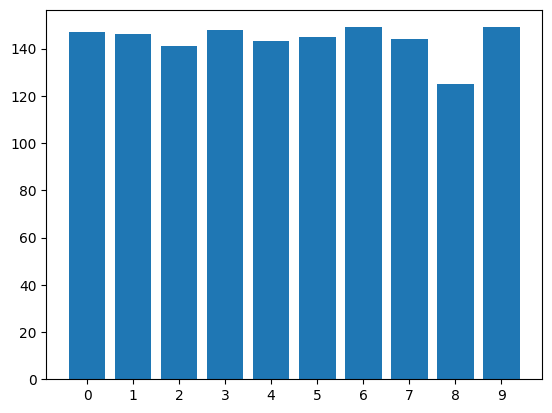

In [10]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
# check if the data is uniform distributed over classes
bins = range(len(outputNames) + 1)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), outputNames)
plt.show()

def flatten(mat):
    x = []
    for line in mat:
        for el in line:
            x.append(el)
    return x

trainInputsFlatten = [flatten(el) for el in trainInputs]
testInputsFlatten = [flatten(el) for el in testInputs]
trainInputsNormalised, testInputsNormalised = normalisation(trainInputsFlatten, testInputsFlatten)

Iteration 1, loss = 2.28195275
Iteration 2, loss = 1.56107061
Iteration 3, loss = 1.07952224
Iteration 4, loss = 0.83381256
Iteration 5, loss = 0.66268356
Iteration 6, loss = 0.55408603
Iteration 7, loss = 0.45779732
Iteration 8, loss = 0.38952416
Iteration 9, loss = 0.34124767
Iteration 10, loss = 0.31147553
Iteration 11, loss = 0.28360686
Iteration 12, loss = 0.25901723
Iteration 13, loss = 0.24325620
Iteration 14, loss = 0.23406851
Iteration 15, loss = 0.22337120
Iteration 16, loss = 0.19959208
Iteration 17, loss = 0.19011605
Iteration 18, loss = 0.17982526
Iteration 19, loss = 0.17015356
Iteration 20, loss = 0.17851182
Iteration 21, loss = 0.16256933
Iteration 22, loss = 0.15175390
Iteration 23, loss = 0.14432872
Iteration 24, loss = 0.13798597
Iteration 25, loss = 0.13415168
Iteration 26, loss = 0.12780411
Iteration 27, loss = 0.12496423
Iteration 28, loss = 0.12008444
Iteration 29, loss = 0.11644992
Iteration 30, loss = 0.11161432
Iteration 31, loss = 0.11326518
Iteration 32, los

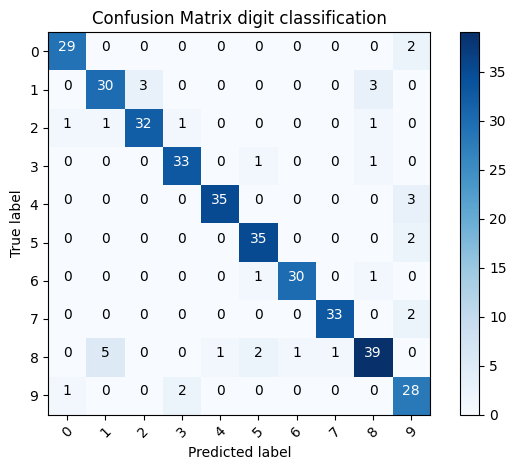

acc:  0.9
precision:  {np.int64(0): np.float64(0.9354838709677419), np.int64(1): np.float64(0.8333333333333334), np.int64(2): np.float64(0.9142857142857143), np.int64(3): np.float64(0.9166666666666666), np.int64(4): np.float64(0.9722222222222222), np.int64(5): np.float64(0.8974358974358975), np.int64(6): np.float64(0.967741935483871), np.int64(7): np.float64(0.9705882352941176), np.int64(8): np.float64(0.8666666666666667), np.int64(9): np.float64(0.7567567567567568)}
recall:  {np.int64(0): np.float64(0.9354838709677419), np.int64(1): np.float64(0.8333333333333334), np.int64(2): np.float64(0.8888888888888888), np.int64(3): np.float64(0.9428571428571428), np.int64(4): np.float64(0.9210526315789473), np.int64(5): np.float64(0.9459459459459459), np.int64(6): np.float64(0.9375), np.int64(7): np.float64(0.9428571428571428), np.int64(8): np.float64(0.7959183673469388), np.int64(9): np.float64(0.9032258064516129)}


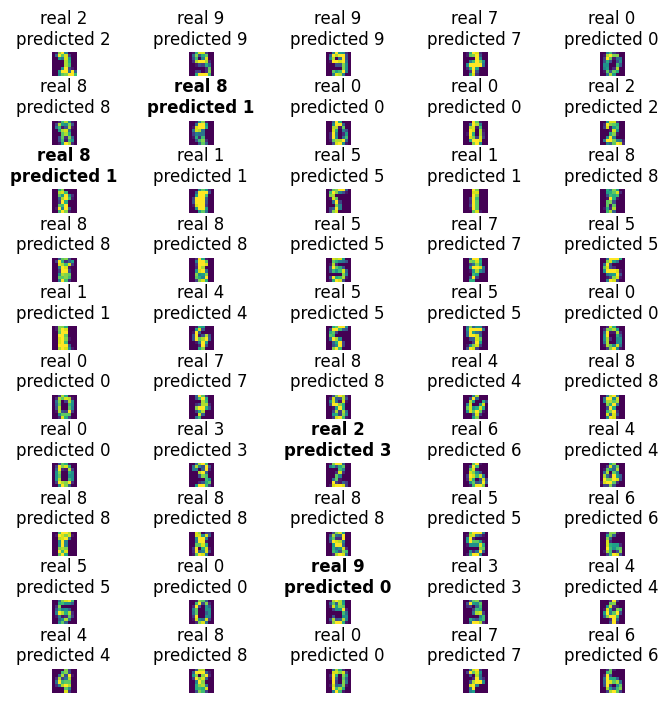

In [11]:
def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

def plotConfusionMatrix(cm, classNames, title):
    from sklearn.metrics import confusion_matrix
    import itertools

    classes = classNames
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()


# try to play by MLP parameters (e.g. change the HL size from 10 to 20 and see how this modification impacts the accuracy)
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5, ), activation='relu', max_iter=1000, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

# training(classifier, trainInputsNormalised, trainOutputs)
classifier.fit(trainInputsNormalised, trainOutputs)

predictedLabels = classifier.predict(testInputsNormalised)
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)


plotConfusionMatrix(cm, outputNames, "digit classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

# plot first 50 test images and their real and computed labels
n = 10
m = 5
fig, axes = plt.subplots(n, m, figsize = (7, 7))
fig.tight_layout()
for i in range(0, n):
    for j in range(0, m):
        axes[i][j].imshow(testInputs[m * i + j])
        if (testOutputs[m * i + j] == predictedLabels[m * i + j]):
            font = 'normal'
        else:
            font = 'bold'
        axes[i][j].set_title('real ' + str(testOutputs[m * i + j]) + '\npredicted ' + str(predictedLabels[m * i + j]), fontweight=font)
        axes[i][j].set_axis_off()

plt.show()